No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 16.0 kHz
Length: 10.0 sec


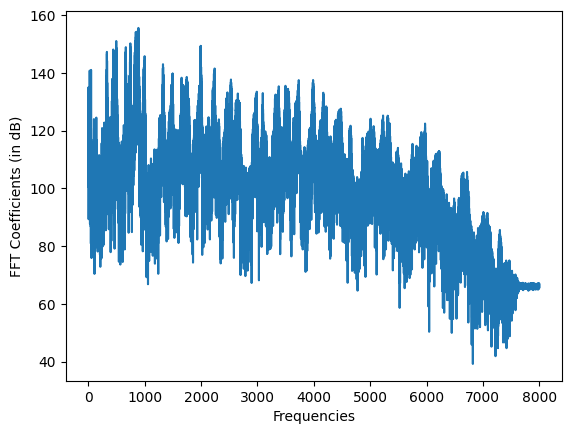

In [ ]:
import matplotlib
import wave
import numpy as np
import matplotlib.pyplot as plt

audio_file = wave.open("music16khz.wav", 'rb')

channels = audio_file.getnchannels()
bit_depth = 8*audio_file.getsampwidth()
sampling_rate = int(audio_file.getframerate())
length = audio_file.getnframes()/sampling_rate

audio = audio_file.readframes(audio_file.getnframes())
audio = np.frombuffer(audio, dtype=np.int16)

print(f"No. of Channels: {channels}\nBit Depth: {bit_depth} bits")
print(f"Sampling Rate: {sampling_rate/1000} kHz\nLength: {length} sec")

y = np.absolute(np.fft.fft(audio))
y_dB = 20*np.log10(y)
halfbracket = int((length*sampling_rate)//2+1)
x = np.linspace(0,sampling_rate//2,halfbracket)

plt.plot(x,y_dB[:halfbracket])
plt.xlabel("Frequencies")
plt.ylabel("FFT Coefficients (in dB)")
plt.show()


In [ ]:

def openaudio(filepath):
    audio_file = wave.open(filepath, 'rb')

    channels = audio_file.getnchannels()
    bit_depth = 8*audio_file.getsampwidth()
    sampling_rate = int(audio_file.getframerate())
    length = audio_file.getnframes()/sampling_rate

    audio = audio_file.readframes(audio_file.getnframes())
    audio = np.frombuffer(audio, dtype=np.int16)

    print(f"No. of Channels: {channels}\nBit Depth: {bit_depth} bits")
    print(f"Sampling Rate: {sampling_rate/1000} kHz\nLength: {length} sec")

    fft_size = int(sampling_rate//20)
    half_size = int(fft_size//2)+1

    sliced_audio = np.lib.stride_tricks.sliding_window_view(audio, window_shape=(fft_size,))
    print(sliced_audio.shape)
    sliced_audio = np.absolute(np.fft.fft(sliced_audio))
    print(sliced_audio.shape)
    X= (np.arange(0,sliced_audio.shape[0],1))/sampling_rate
    print(X.shape)
    Y= np.log2((np.linspace(0,0.5, half_size)[1:])*sampling_rate)
    print(Y.shape)

    sliced_audio = 20*np.log10(np.transpose(sliced_audio[:,1:half_size]))
    print(sliced_audio.shape)

    return (X,Y,sliced_audio, sampling_rate, audio)

def openaudio2(filepath):
    audio_file = wave.open(filepath, 'rb')

    channels = audio_file.getnchannels()
    bit_depth = 8*audio_file.getsampwidth()
    sampling_rate = int(audio_file.getframerate())
    length = audio_file.getnframes()/sampling_rate

    audio = audio_file.readframes(audio_file.getnframes())
    audio = np.frombuffer(audio, dtype=np.int16)

    print(f"No. of Channels: {channels}\nBit Depth: {bit_depth} bits")
    print(f"Sampling Rate: {sampling_rate/1000} kHz\nLength: {length} sec")

    fft_size = int(sampling_rate//20)
    half_size = int(fft_size//2)+1

    sliced_audio = np.lib.stride_tricks.sliding_window_view(audio, window_shape=(fft_size,))[::9]
    print(sliced_audio.shape)
    sliced_audio = np.absolute(np.fft.fft(sliced_audio))
    print(sliced_audio.shape)
    X= (np.arange(0,sliced_audio.shape[0],1))/sampling_rate
    print(X.shape)
    Y= np.log2((np.linspace(0,0.5, half_size)[1:])*sampling_rate)
    print(Y.shape)

    sliced_audio = 20*np.log10(np.transpose(sliced_audio[:,1:half_size]))
    print(sliced_audio.shape)

    return (X,Y,sliced_audio, sampling_rate, audio)

In [ ]:
def spectrum(X,Y,Z, min, max, savepath):
    _, ax = plt.subplots(1,1)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "orange"])
    norm=plt.Normalize(min,max,clip=True)

    ax.contourf(X, Y, Z, cmap = cmap, norm=norm)

    ax.set_title('Discrete Spectrogram')
    ax.set_xlabel('Time (in Seconds)')

    ax.set_ylabel('Frequency (Logarithmic to Base 2)')
    plt.savefig(savepath)
    plt.show()

def spectrum2(X,Y,Z, savepath):
    _, ax = plt.subplots(1,1)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black", "orange"])
    norm=plt.Normalize(np.std(np.power(10,Z/50))*1.5,np.max(np.power(10,Z/50))/1.5,clip=True)

    ax.contourf(X, Y, np.power(10,Z/50), cmap = cmap, norm=norm)

    ax.set_title('Discrete Spectrogram')
    ax.set_xlabel('Time (in Seconds)')

    ax.set_ylabel('Frequency (Logarithmic to Base 2)')
    plt.savefig(savepath)
    plt.show()


In [ ]:
X_1,Y_1,Z_1,sampling_rate_1, audio_1 = openaudio("music16khz.wav")
X_2,Y_2,Z_2, sampling_rate_2, audio_2 = openaudio("speech8khz.wav")

NameError: ignored

In [ ]:
audio_1_d = audio_1[::2]
samples = audio_1.size

# Open a WAV file for writing
with wave.open('music8khz.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_1//2)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_1_d.tobytes())

In [ ]:
X_3,Y_3,Z_3, sampling_rate_3, audio_1_d = openaudio("music8khz.wav")

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 8.0 kHz
Length: 10.0 sec
(79601, 400)
(79601, 400)
(79601,)
(200,)
(200, 79601)


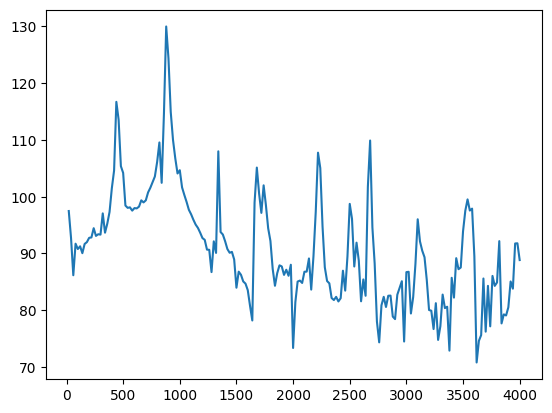

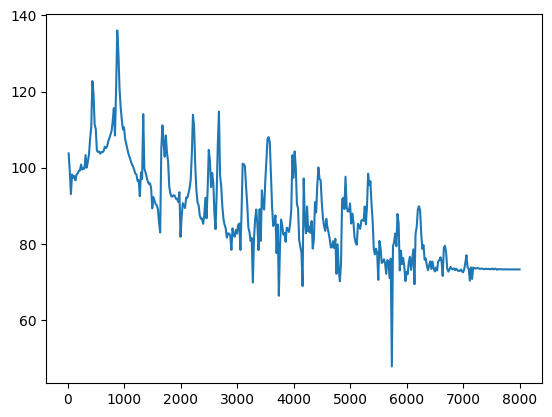

In [ ]:
k = 9100
plt.plot(np.power(2,Y_3), Z_3[:,k].flatten())
plt.show()
plt.plot(np.power(2,Y_1), Z_1[:,2*k].flatten())
plt.show()

In [ ]:
audio_2_d = audio_2[::2]
samples = audio_2.size

# Open a WAV file for writing
with wave.open('speech4khz.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_2//2)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_2_d.tobytes())

In [ ]:
X_4,Y_4,Z_4, sampling_rate_4, audio_2_d = openaudio("speech4khz.wav")

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 4.0 kHz
Length: 10.0 sec
(39801, 200)
(39801, 200)
(39801,)
(100,)
(100, 39801)


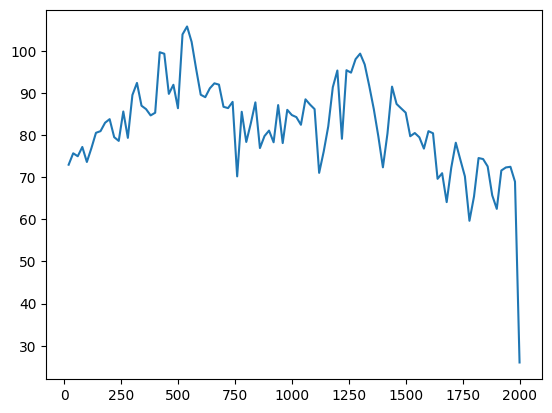

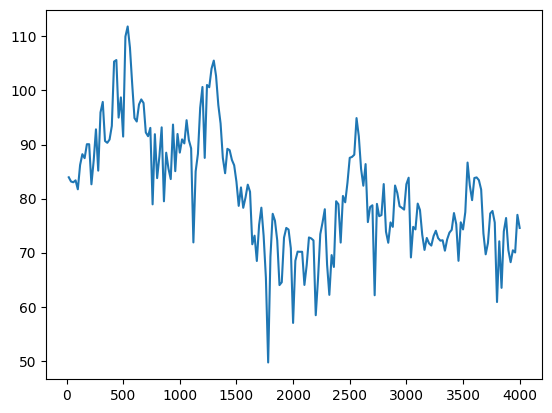

In [ ]:
k = 200
plt.plot(np.power(2,Y_4), Z_4[:,k].flatten())
plt.show()
plt.plot(np.power(2,Y_2), Z_2[:,2*k].flatten())
plt.show()

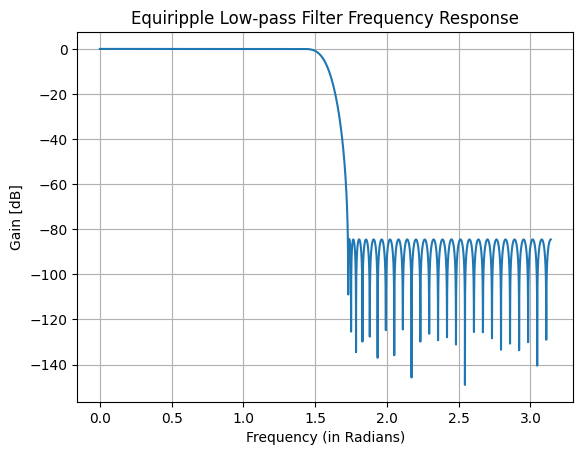

In [ ]:
from scipy.signal import remez, freqz

omega_p = 0.45 * 0.5
omega_s = 0.55 * 0.5
delta_p = 0.02
delta_s = 0.02

filter_coeffs = remez(101, [0, omega_p, omega_s, 0.5], [1,0], [delta_p, delta_s])

w, h = freqz(filter_coeffs, worN=8000)

plt.plot( w, 20 * np.log10(np.abs(h)))
plt.title('Equiripple Low-pass Filter Frequency Response')
plt.xlabel('Frequency (in Radians)')
plt.ylabel('Gain [dB]')
plt.grid(True)
plt.show()


In [ ]:
from scipy.signal import lfilter

audio_1_f = lfilter(filter_coeffs, 1.0, audio_1)[::2].astype(np.uint16)
samples = audio_1_f.size

with wave.open('music8khz_filtered.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_1//2)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_1_f.tobytes())

In [ ]:
X_6,Y_6,Z_6, sampling_rate_6, audio_1_f = openaudio("music8khz_filtered.wav")

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 8.0 kHz
Length: 10.0 sec
(79601, 400)
(79601, 400)
(79601,)
(200,)
(200, 79601)


In [ ]:
from scipy.signal import lfilter

audio_2_f = lfilter(filter_coeffs, 1.0, audio_2)[::2].astype(np.uint16)
samples = audio_2_f.size

with wave.open('speech4khz_filtered.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_2//2)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_2_f.tobytes())

NameError: ignored

In [ ]:
'''spectrum2(X_1,Y_1,Z_1, "music_16khz.png")
spectrum2(X_2,Y_2,Z_2, "speech_8khz.png")
spectrum2(X_3,Y_3,Z_3, "music_8khz.png")
spectrum2(X_4,Y_4,Z_4, "speech_4khz.png")
spectrum2(X_6,Y_6,Z_6, "music_8khz_filtered.png")
spectrum2(X_7,Y_7,Z_7, "speech_4khz_filtered.png")'''

'spectrum2(X_1,Y_1,Z_1, "music_16khz.png")\nspectrum2(X_2,Y_2,Z_2, "speech_8khz.png")\nspectrum2(X_3,Y_3,Z_3, "music_8khz.png")\nspectrum2(X_4,Y_4,Z_4, "speech_4khz.png")\nspectrum2(X_6,Y_6,Z_6, "music_8khz_filtered.png")\nspectrum2(X_7,Y_7,Z_7, "speech_4khz_filtered.png")'

In [ ]:
from scipy.signal import remez, freqz

omega_p_2 = 0.22 * 0.5
omega_s_2 = 0.28 * 0.5

filter_coeffs_2 = remez(101, [0, omega_p_2, omega_s_2, 0.5], [1,0], [0.02,0.02])

w_2, h_2 = freqz(filter_coeffs_2, worN=8000)

plt.plot(w_2, 20 * np.log10(np.abs(h_2)))
plt.title('Equiripple Low-pass Filter Frequency Response')
plt.xlabel('Frequency (in Radians)')
plt.ylabel('Gain [dB]')
plt.grid(True)
plt.show()

NameError: ignored

In [ ]:
audio_1_u = np.zeros(audio_1.size * 3, dtype=np.uint16)
audio_1_u[::3] = audio_1.copy()
samples = audio_1_u.size
# Open a WAV file for writing
with wave.open('music48khz.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_1*3)
    wav_file.setnframes(samples)
    wav_file.writeframes(b'')
    print(len(np.array_split(audio_1_u,8000)))
    for i in np.array_split(audio_1_u,8000):
        wav_file.writeframes(i.tobytes())

8000


No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 48.0 kHz
Length: 10.0 sec
(53067, 2400)
(53067, 2400)
(53067,)
(1200,)
(1200, 53067)


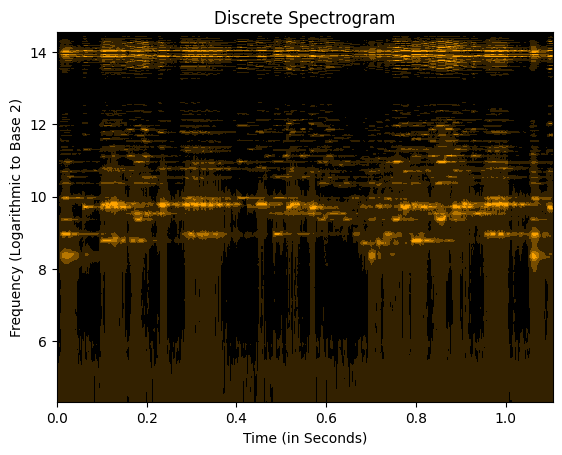

In [ ]:
X_8,Y_8,Z_8, sampling_rate_8, audio_1_u = openaudio2("music48khz.wav")
spectrum2(X_8,Y_8,Z_8, "music_48khz.png")

In [ ]:
audio_2_u = np.zeros(audio_2.size * 3, dtype=np.uint16)
audio_2_u[::3] = audio_2.copy()
samples = audio_2_u.size
# Open a WAV file for writing
with wave.open('speech24khz.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_2*3)
    wav_file.setnframes(samples)
    wav_file.writeframes(b'')
    print(len(np.array_split(audio_2_u,8000)))
    for i in np.array_split(audio_2_u,8000):
        wav_file.writeframes(i.tobytes())

8000


No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 24.0 kHz
Length: 10.0 sec
(26534, 1200)
(26534, 1200)
(26534,)
(600,)
(600, 26534)


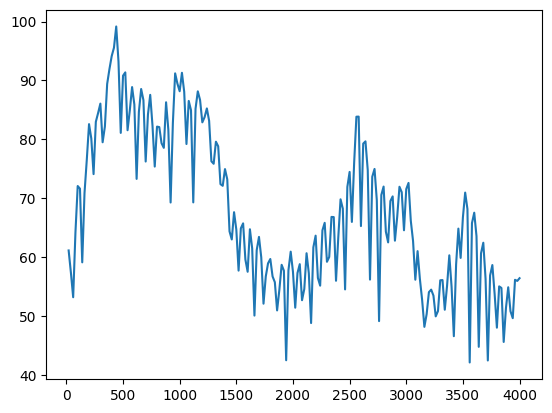

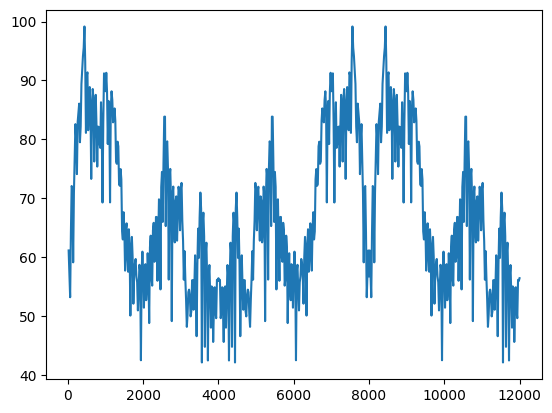

In [ ]:
X_9,Y_9,Z_9, sampling_rate_9, audio_2_u = openaudio2("speech24khz.wav")

k = 200
plt.plot(np.power(2,Y_2), Z_2[:,k*3].flatten())
plt.show()
plt.plot(np.power(2,Y_9), Z_9[:,k].flatten())
plt.show()

In [ ]:
audio_1_ud = lfilter(filter_coeffs_2, 1.0, audio_1_u)[::4].astype(np.uint16)
samples = audio_1_ud.size
print(samples)

with wave.open('music_12khz.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate((sampling_rate_1*3)//4)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_1_ud.tobytes())
X_10,Y_10,Z_10, sampling_rate_10, audio_1_ud = openaudio("music_12khz.wav")

120000
No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 12.0 kHz
Length: 10.0 sec
(119401, 600)
(119401, 600)
(119401,)
(300,)
(300, 119401)


In [ ]:
audio_2_ud = lfilter(filter_coeffs_2, 1.0, audio_2_u)[::4].astype(np.uint16)
samples = audio_2_ud.size
print(samples)

with wave.open('speech_6khz.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate((sampling_rate_2*3)//4)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_2_ud.tobytes())
X_11,Y_11,Z_11, sampling_rate_11, audio_2_ud = openaudio("speech_6khz.wav")

60000
No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 6.0 kHz
Length: 10.0 sec
(59701, 300)
(59701, 300)
(59701,)
(150,)
(150, 59701)


<ipython-input-6-02aec7122586>:27: RuntimeWarning: divide by zero encountered in log10
  sliced_audio = 20*np.log10(np.transpose(sliced_audio[:,1:half_size]))


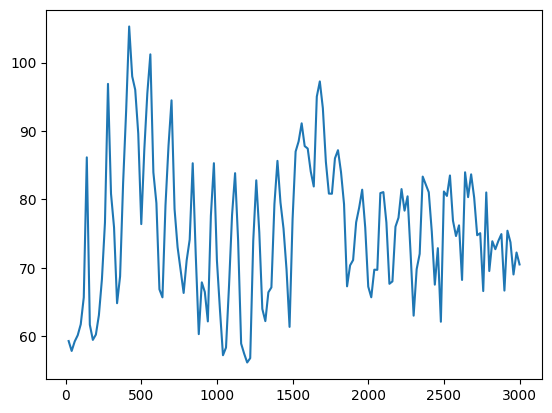

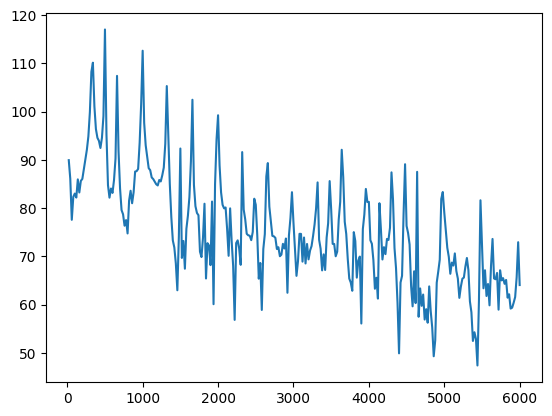

In [ ]:
k = 2000
plt.plot(np.power(2,Y_11), Z_11[:,k].flatten())
plt.show()
plt.plot(np.power(2,Y_10), Z_10[:,k].flatten())
plt.show()

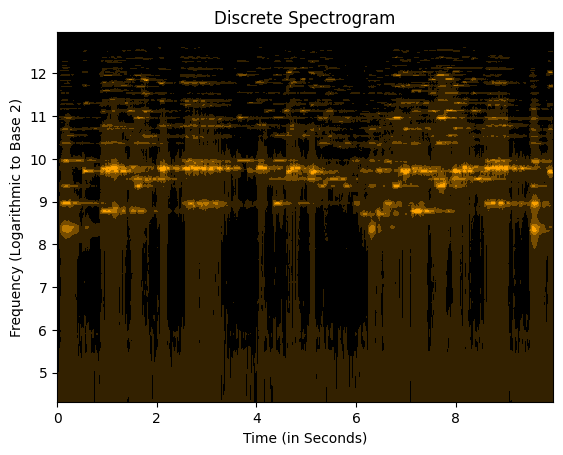

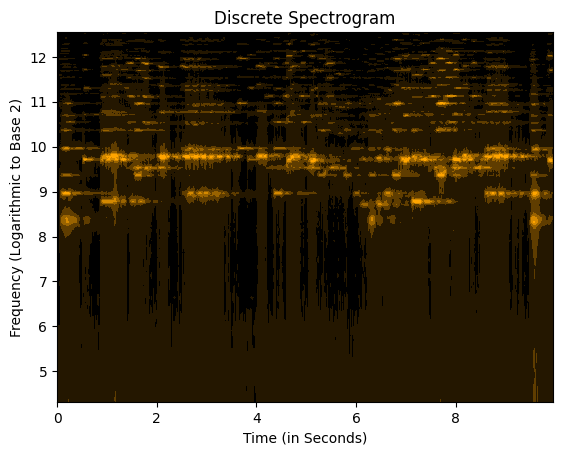

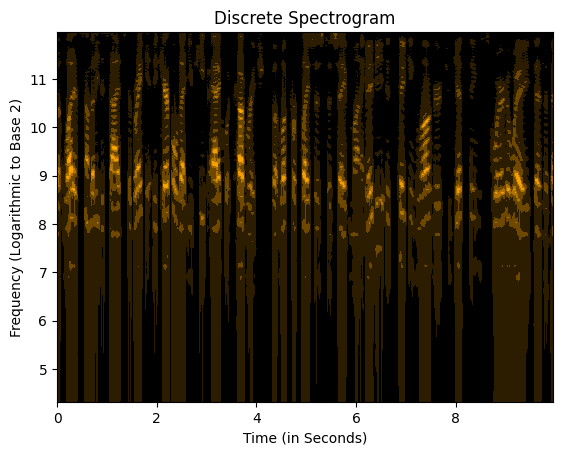

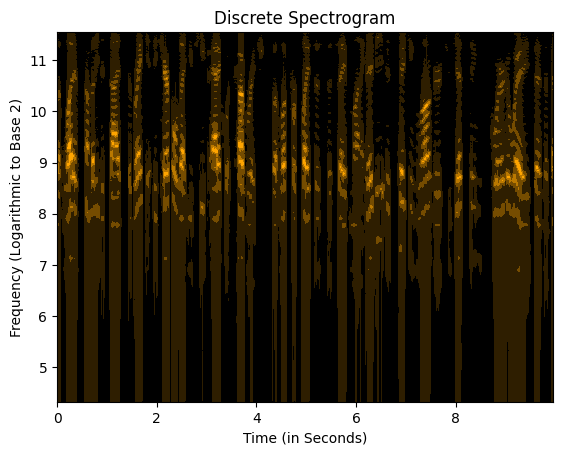

In [ ]:
spectrum2(X_1,Y_1,Z_1, "music_16khz.png")
spectrum2(X_10,Y_10,Z_10, "music_12khz.png")
spectrum2(X_2,Y_2,Z_2, "speech_8khz.png")
spectrum2(X_11,Y_11,Z_11, "speech_6khz.png")

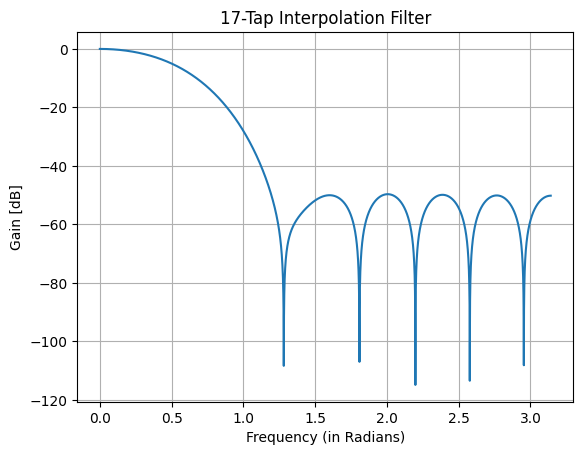

In [ ]:
from scipy.signal import firwin

filter_coeffs_3 = firwin(17, 1/6)

w_3, h_3 = freqz(filter_coeffs_3, worN=8000)

plt.plot(w_3, 20 * np.log10(np.abs(h_3)))
plt.title('17-Tap Interpolation Filter')
plt.xlabel('Frequency (in Radians)')
plt.ylabel('Gain [dB]')
plt.grid(True)
plt.show()


In [ ]:
audio_1_du = np.zeros(audio_1.size*3//4, dtype=np.uint16)
audio_1_du[::3] = lfilter(filter_coeffs_2, 1.0, audio_1)[::4].astype(np.uint16)
samples = audio_1_du.size

with wave.open('music_du.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate((sampling_rate_1*3)//4)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_1_du.tobytes())
X_12,Y_12,Z_12, sampling_rate_12, audio_1_du = openaudio("music_du.wav")

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 12.0 kHz
Length: 10.0 sec
(119401, 600)
(119401, 600)
(119401,)
(300,)
(300, 119401)


<ipython-input-6-02aec7122586>:27: RuntimeWarning: divide by zero encountered in log10
  sliced_audio = 20*np.log10(np.transpose(sliced_audio[:,1:half_size]))


In [ ]:
audio_2_du = np.zeros(audio_2.size*3//4, dtype=np.uint16)
audio_2_du[::3] = lfilter(filter_coeffs_2, 1.0, audio_2)[::4].astype(np.uint16)
samples = audio_2_du.size

with wave.open('speech_du.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate((sampling_rate_2*3)//4)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_2_du.tobytes())
X_13,Y_13,Z_13, sampling_rate_13, audio_2_du = openaudio("speech_du.wav")

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 6.0 kHz
Length: 10.0 sec
(59701, 300)
(59701, 300)
(59701,)
(150,)
(150, 59701)


<ipython-input-6-02aec7122586>:27: RuntimeWarning: divide by zero encountered in log10
  sliced_audio = 20*np.log10(np.transpose(sliced_audio[:,1:half_size]))


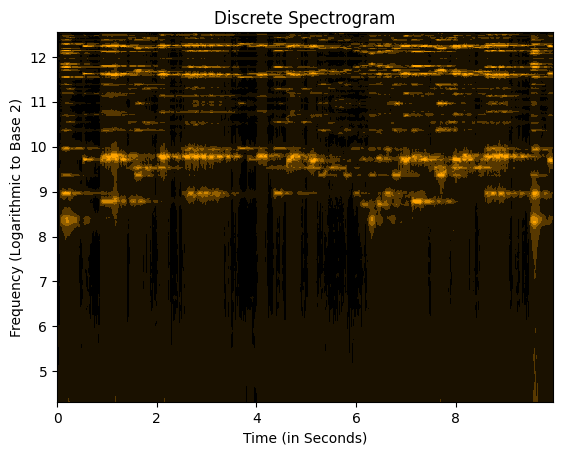

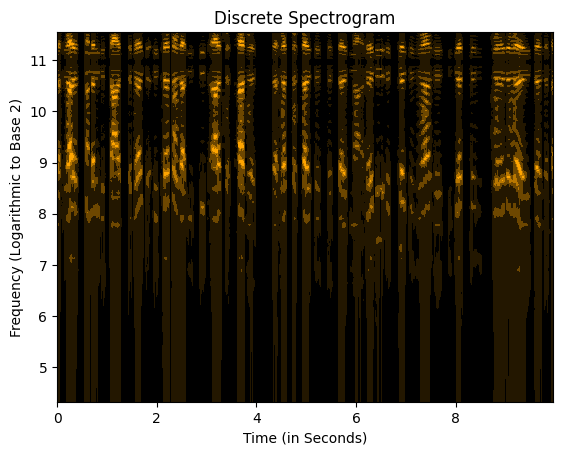

In [ ]:
spectrum2(X_12,Y_12,Z_12, "music_du.png")
spectrum2(X_13,Y_13,Z_13, "speech_du.png")

In [ ]:
audio_1_du_filtered = lfilter(filter_coeffs_3, 1.0, audio_1_du).astype(np.uint16)
audio_2_du_filtered = lfilter(filter_coeffs_3, 1.0, audio_2_du).astype(np.uint16)

samples = audio_1_du_filtered.size

with wave.open('music_du_filtered.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate((sampling_rate_1*3)//4)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_1_du_filtered.tobytes())
X_14,Y_14,Z_14, sampling_rate_14, audio_1_du_filtered = openaudio('music_du_filtered.wav')

samples = audio_2_du_filtered.size

with wave.open('speech_du_filtered.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate((sampling_rate_2*3)//4)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_2_du_filtered.tobytes())
X_15,Y_15,Z_15, sampling_rate_14, audio_2_du_filtered = openaudio('speech_du_filtered.wav')

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 12.0 kHz
Length: 10.0 sec
(119401, 600)
(119401, 600)
(119401,)
(300,)
(300, 119401)
No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 6.0 kHz
Length: 10.0 sec
(59701, 300)
(59701, 300)
(59701,)
(150,)
(150, 59701)


<ipython-input-6-02aec7122586>:27: RuntimeWarning: divide by zero encountered in log10
  sliced_audio = 20*np.log10(np.transpose(sliced_audio[:,1:half_size]))


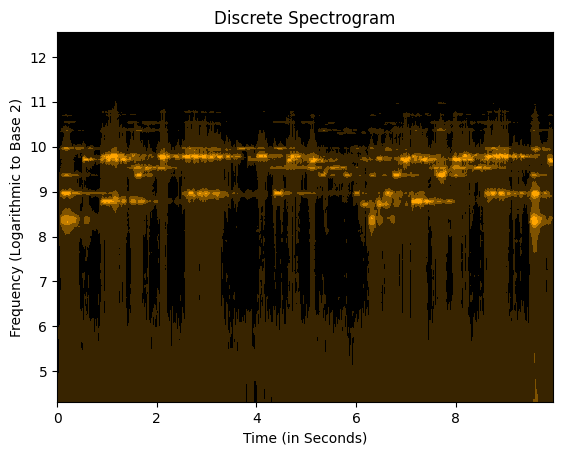

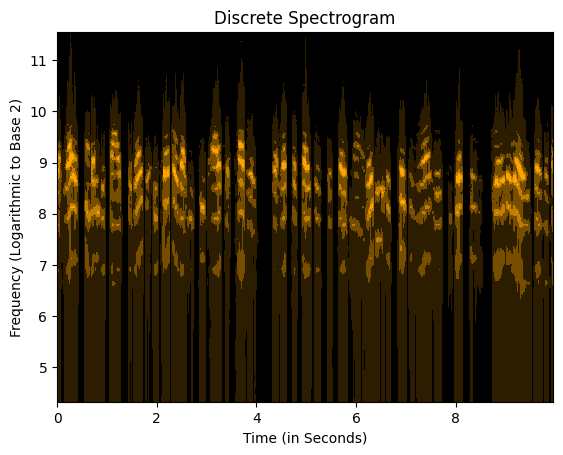

In [ ]:
spectrum2(X_14,Y_14,Z_14, "music_du_filtered.png")
spectrum2(X_15,Y_15,Z_15, "speech_du_filtered.png")

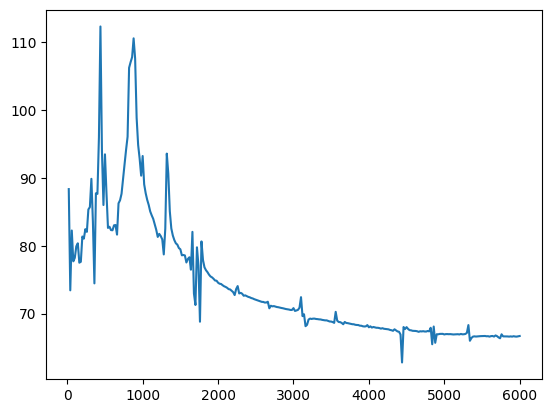

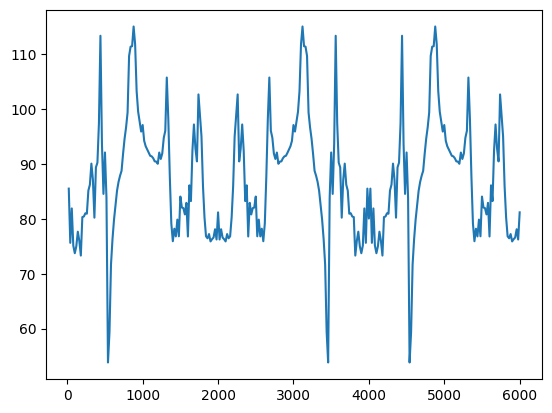

In [ ]:
k = 12000
plt.plot(np.power(2,Y_14), Z_14[:,k].flatten())
plt.show()
plt.plot(np.power(2,Y_12), Z_12[:,k].flatten())
plt.show()

# Experiment 2

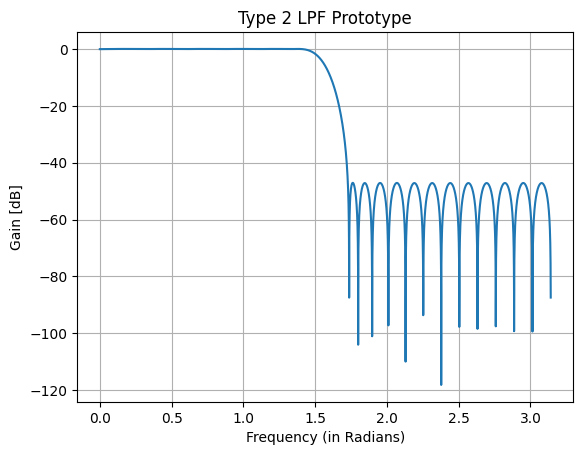

In [ ]:
from scipy.signal import remez, freqz
import numpy as np
import matplotlib.pyplot as plt

omega_p_4 = 0.45 * 0.5
omega_s_4 = 0.55 * 0.5
delta_p_4 = 0.02
delta_s_4 = 0.02
H_naught = remez(50, [0, omega_p_4, omega_s_4, 0.5],[1,0], [delta_p_4 ,delta_s_4])
w_4, h_4 = freqz(H_naught, worN=8000)

plt.plot(w_4, 20  * np.log10(np.abs(h_4)))
plt.title('Type 2 LPF Prototype')
plt.xlabel('Frequency (in Radians)')
plt.ylabel('Gain [dB]')
plt.grid(True)
plt.show()

In [ ]:
print(H_naught.size)
H0 = np.zeros(49)
H0[::2]=H_naught[0::2]
H1 = np.zeros(49)
H1[::2]=H_naught[1::2]

50


In [ ]:
print(H1.size)

49


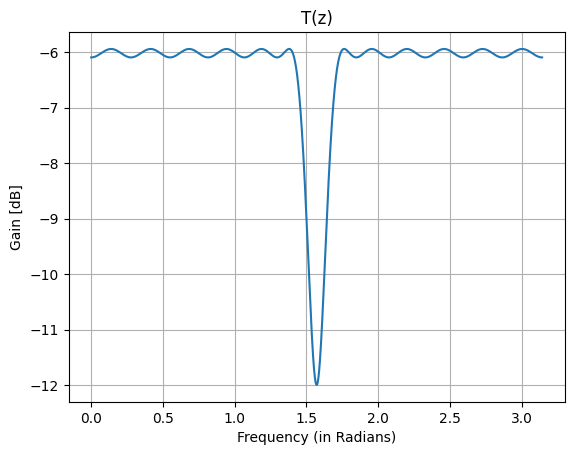

In [ ]:
K0_a = H1.copy()
K1_a = H0.copy()

K0H0_a = np.convolve(H0, K0_a, mode='full')
K1H1_a = np.convolve(H1, K1_a, mode='full')

w_5, h_5 = freqz(K0H0_a+K1H1_a, worN=48000)

plt.plot(w_5, 20  * np.log10(np.abs(h_5)))
plt.title('T(z)')
plt.xlabel('Frequency (in Radians)')
plt.ylabel('Gain [dB]')
plt.grid(True)
plt.show()

In [ ]:
print(K0H0_a.size)

97


In [ ]:
K0_b = H0.copy()
K1_b = H1.copy()

K0H0_b = np.convolve(H0, K0_b, mode='full')
K1H1_b = np.convolve(H1, K1_b, mode='full')

In [ ]:
X_1,Y_1,Z_1,sampling_rate_1, audio_1 = openaudio("music16khz.wav")
X_2,Y_2,Z_2, sampling_rate_2, audio_2 = openaudio("speech8khz.wav")

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 16.0 kHz
Length: 10.0 sec
(159201, 800)
(159201, 800)
(159201,)
(400,)
(400, 159201)
No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 8.0 kHz
Length: 10.0 sec
(79601, 400)
(79601, 400)
(79601,)
(200,)
(200, 79601)


No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 8.0 kHz
Length: 10.0 sec
(79601, 400)
(79601, 400)
(79601,)
(200,)
(200, 79601)
No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 8.0 kHz
Length: 10.0 sec
(79601, 400)
(79601, 400)
(79601,)
(200,)


<ipython-input-42-02aec7122586>:27: RuntimeWarning: divide by zero encountered in log10
  sliced_audio = 20*np.log10(np.transpose(sliced_audio[:,1:half_size]))


(200, 79601)


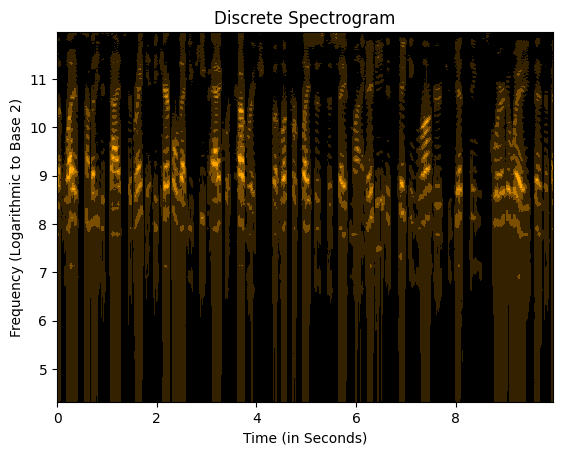

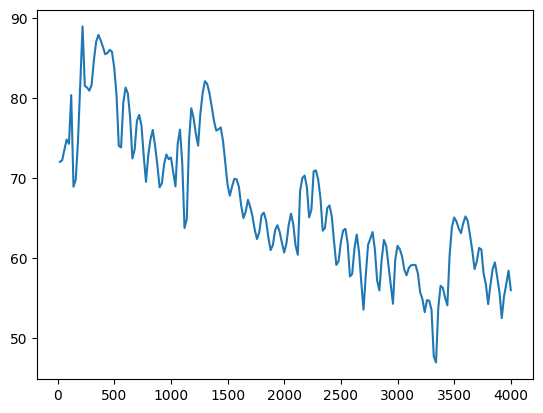

In [ ]:
X_1,Y_1,Z_1,sampling_rate_1, audio_1 = openaudio("speech8khz.wav")
from scipy.signal import lfilter

audio_1_negz = audio_1.copy()
audio_1_negz[1::2] -= audio_1_negz[1::-2]*2
audio_1_FB = lfilter(K0H0_a+K1H1_a, 1.0, audio_1).astype(np.uint16) + lfilter(K0H0_a-K1H1_a, 1.0, audio_1_negz).astype(np.uint16)
samples = audio_1_FB.size

with wave.open('Speech_FB_a.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_1)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_1_FB.tobytes())

X_3,Y_3,Z_3,sampling_rate_3,audio_3 = openaudio("Speech_FB_a.wav")
spectrum2(X_3,Y_3,Z_3,"Speech_FB_a.jpeg")
k = 12000
plt.plot(np.power(2,Y_3), Z_3[:,k].flatten())
plt.show()

No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 8.0 kHz
Length: 10.0 sec
(79601, 400)
(79601, 400)
(79601,)
(200,)
(200, 79601)
No. of Channels: 1
Bit Depth: 16 bits
Sampling Rate: 8.0 kHz
Length: 10.0 sec
(79601, 400)
(79601, 400)
(79601,)
(200,)
(200, 79601)


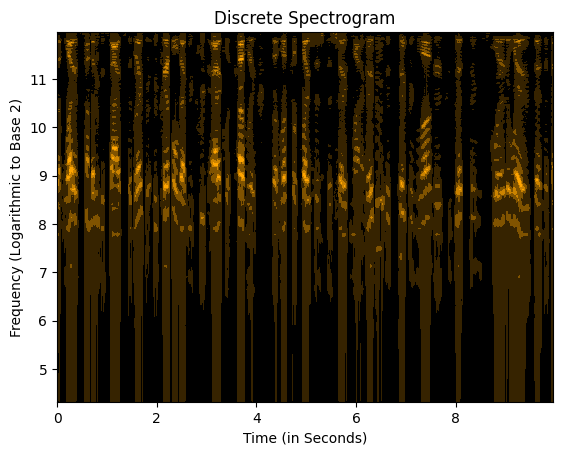

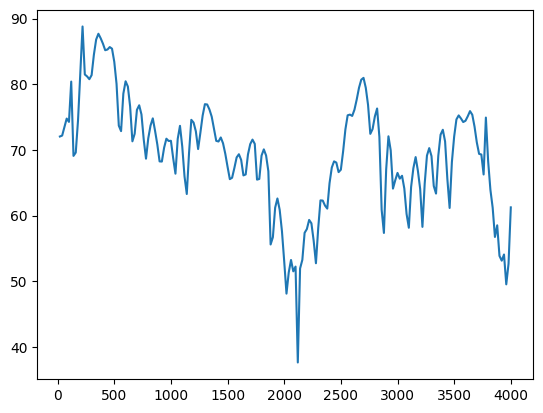

In [ ]:
X_1,Y_1,Z_1,sampling_rate_1, audio_1 = openaudio("speech8khz.wav")
from scipy.signal import lfilter

audio_1_negz = audio_1.copy()
audio_1_negz[1::2] -= audio_1_negz[1::2]*2
audio_1_FB = lfilter(K0H0_b+K1H1_b, 1.0, audio_1).astype(np.uint16) + lfilter(K0H0_b-K1H1_b, 1.0, audio_1_negz).astype(np.uint16)
samples = audio_1_FB.size

with wave.open('Speech_FB_b.wav', 'wb') as wav_file:
    wav_file.setnchannels(1)
    wav_file.setsampwidth(2)
    wav_file.setframerate(sampling_rate_1)
    wav_file.setnframes(samples)
    wav_file.writeframes(audio_1_FB.tobytes())

X_4,Y_4,Z_4,sampling_rate_4,audio_4 = openaudio("Speech_FB_b.wav")
spectrum2(X_4,Y_4,Z_4,"Speech_FB_b.jpeg")
k = 12000
plt.plot(np.power(2,Y_4), Z_4[:,k].flatten())
plt.show()

<ipython-input-73-0fffce92f815>:3: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w_5, 20  * np.log10(np.abs(h_5)))


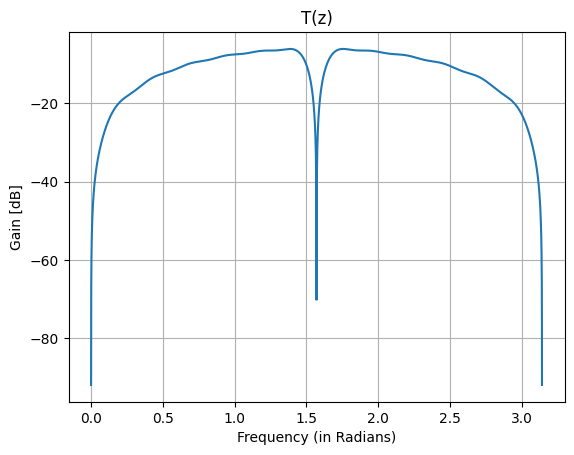

In [ ]:
w_5, h_5 = freqz(K0H0_b-K1H1_b, worN=48000)

plt.plot(w_5, 20  * np.log10(np.abs(h_5)))
plt.title('T(z)')
plt.xlabel('Frequency (in Radians)')
plt.ylabel('Gain [dB]')
plt.grid(True)
plt.show()